<a href="https://colab.research.google.com/github/romy081216369646/PCVK_GANJIL_2025/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

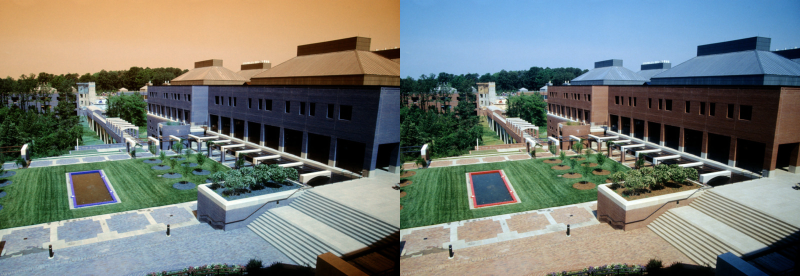



Resolusi image: 276 x 400


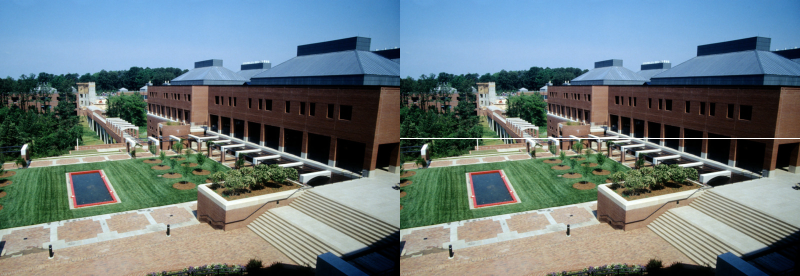

>> Gambar dengan garis horizontal


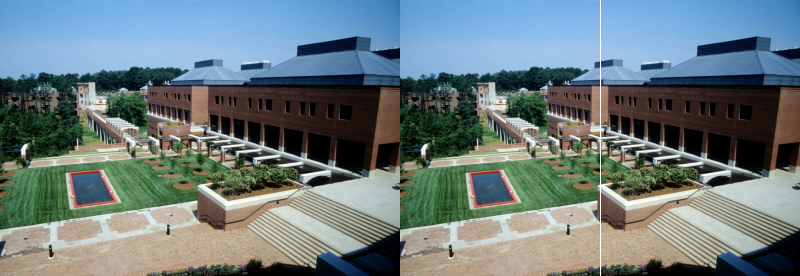

>> Gambar dengan garis vertikal


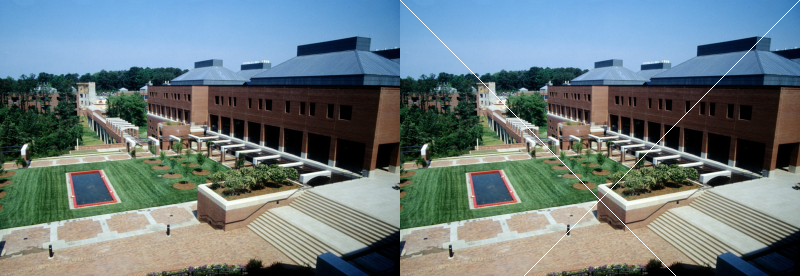

>> Gambar dengan garis X (diagonal)


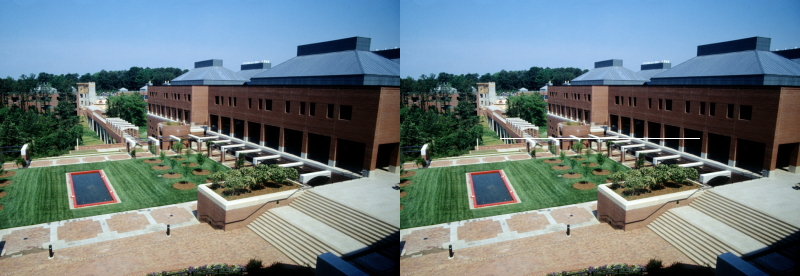

>> Garis horizontal putih di tengah (panjang terbatas)


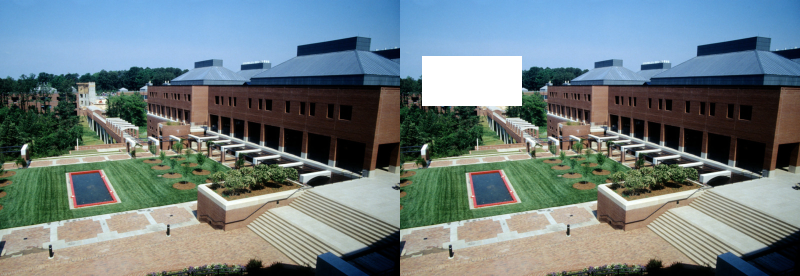

>> Kotak putih 100x50 di posisi (56, 22)


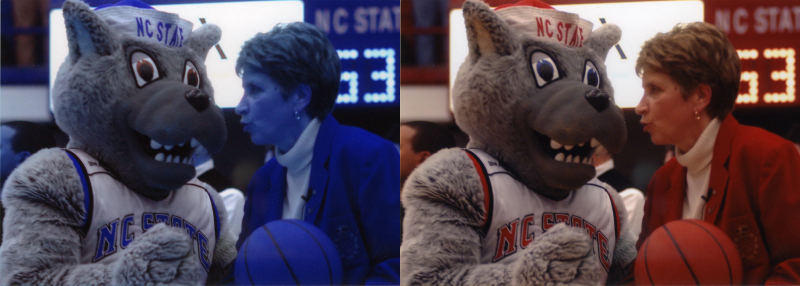



Resolusi image: 286 x 400


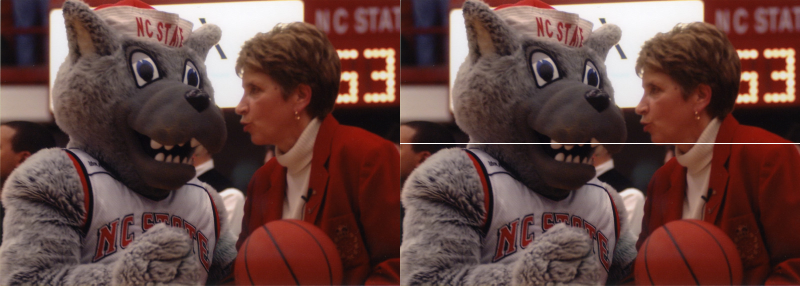

>> Gambar dengan garis horizontal


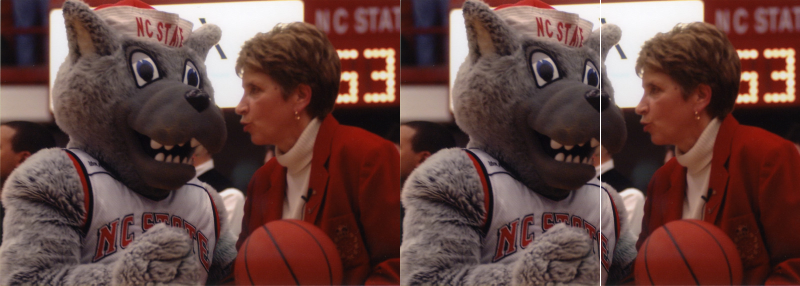

>> Gambar dengan garis vertikal


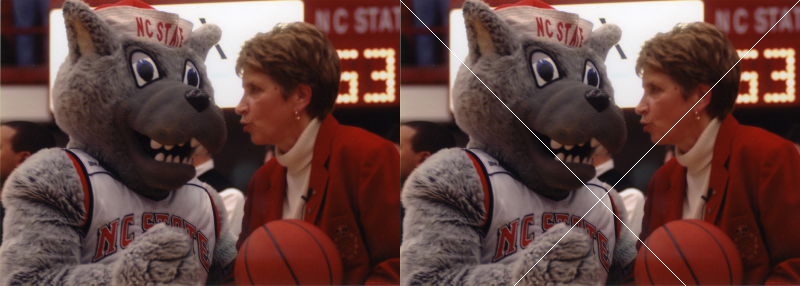

>> Gambar dengan garis X (diagonal)


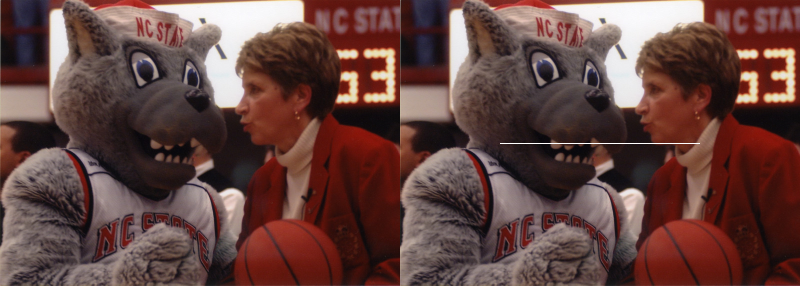

>> Garis horizontal putih di tengah (panjang terbatas)


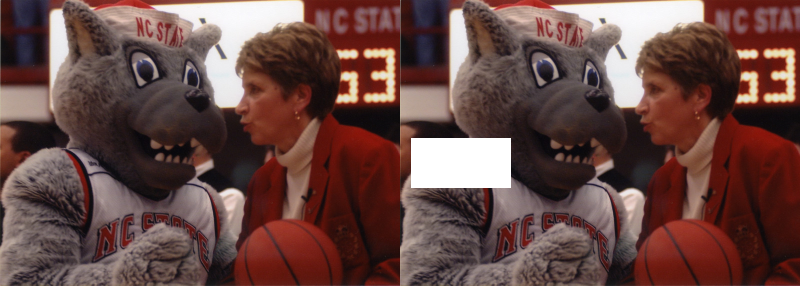

>> Kotak putih 100x50 di posisi (138, 11)


HTTPError: HTTP Error 521: <none>

In [33]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pylab as plt

# Daftar URL gambar
urls = [
    "https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg",
    "https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg",
    "https://placekitten.com/800/571"
]

for url in urls:
    # Baca gambar dari URL
    image = io.imread(url)

    # Resize gambar (50%)
    image = cv.resize(image, (0, 0), fx=0.5, fy=0.5)

    # Konversi ke RGB
    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

     # Gabungkan gambar asli dan hasil konversi
    final_frame = cv.hconcat([image, image_rgb])
    cv2_imshow(final_frame)
    print("\n")

    # Ambil resolusi
    tinggi, lebar = image_rgb.shape[:2]
    print("Resolusi image:", tinggi, "x", lebar)

    # ---------- Garis Horizontal ----------
    img_horizontal = image_rgb.copy()
    for y in range(lebar):
        img_horizontal[int(tinggi/2), y] = [255, 255, 255]
    final_h = cv.hconcat([image_rgb, img_horizontal])
    cv2_imshow(final_h)
    print(">> Gambar dengan garis horizontal")

    # ---------- Garis Vertikal ----------
    img_vertical = image_rgb.copy()
    for x in range(tinggi):
        img_vertical[x, int(lebar/2)] = [255, 255, 255]
    final_v = cv.hconcat([image_rgb, img_vertical])
    cv2_imshow(final_v)
    print(">> Gambar dengan garis vertikal")

    # ---------- Garis X (Diagonal) ----------
    img_diagonal = image_rgb.copy()
    for d in range(min(tinggi, lebar)):
        img_diagonal[d, d] = [255, 255, 255]                   # ↘
        img_diagonal[d, lebar - 1 - d] = [255, 255, 255]       # ↙
    final_x = cv.hconcat([image_rgb, img_diagonal])
    cv2_imshow(final_x)
    print(">> Gambar dengan garis X (diagonal)")

    img_hline = image_rgb.copy()
    line_length = min(200, lebar)   # panjang garis (maksimal 200 px atau selebar gambar)
    start_x = int((lebar - line_length) / 2)   # supaya posisinya di tengah
    end_x = start_x + line_length
    y_mid = int(tinggi / 2)

    for x in range(start_x, end_x):
        img_hline[y_mid, x] = [255, 255, 255]   # putih

    final_hline = cv.hconcat([image_rgb, img_hline])
    cv2_imshow(final_hline)
    print(">> Garis horizontal putih di tengah (panjang terbatas)")

    # ---------- Kotak Putih di Sembarang Tempat ----------
    img_box = image_rgb.copy()
    box_height, box_width = 50, 100   # ukuran kotak
    start_y = np.random.randint(0, tinggi - box_height)
    start_x = np.random.randint(0, lebar - box_width)

    img_box[start_y:start_y+box_height, start_x:start_x+box_width] = [255, 255, 255]

    final_box = cv.hconcat([image_rgb, img_box])
    cv2_imshow(final_box)
    print(f">> Kotak putih {box_width}x{box_height} di posisi ({start_y}, {start_x})")
    print("=" * 60)
